In [1]:
import pandas as pd

data = {
    "User_ID": ["U001", "U002", "U003", "U001", "U004"],
    "Role": ["Admin", "Analyst", "Analyst", "Admin", "Intern"],
    "Login_Time": ["09:05", "10:10", "02:30", "02:45", "11:00"],
    "Location": ["India", "India", "Unknown", "Unknown", "India"],
    "Login_Status": ["Success", "Success", "Failed", "Failed", "Success"]
}

df = pd.DataFrame(data)
df


,User_ID,Role,Login_Time,Location,Login_Status
0,U001,Admin,09:05,India,Success
1,U002,Analyst,10:10,India,Success
2,U003,Analyst,02:30,Unknown,Failed
3,U001,Admin,02:45,Unknown,Failed
4,U004,Intern,11:00,India,Success


In [2]:
df["Security_Flag"] = df.apply(
    lambda x: "Suspicious"
    if x["Location"] == "Unknown" or x["Login_Status"] == "Failed"
    else "Normal",
    axis=1
)

df


,User_ID,Role,Login_Time,Location,Login_Status,Security_Flag
0,U001,Admin,09:05,India,Success,Normal
1,U002,Analyst,10:10,India,Success,Normal
2,U003,Analyst,02:30,Unknown,Failed,Suspicious
3,U001,Admin,02:45,Unknown,Failed,Suspicious
4,U004,Intern,11:00,India,Success,Normal


In [3]:
df["Security_Flag"].value_counts()


,count
Security_Flag,
Normal,3
Suspicious,2


In [4]:
df["Role"].value_counts()


,count
Role,
Admin,2
Analyst,2
Intern,1


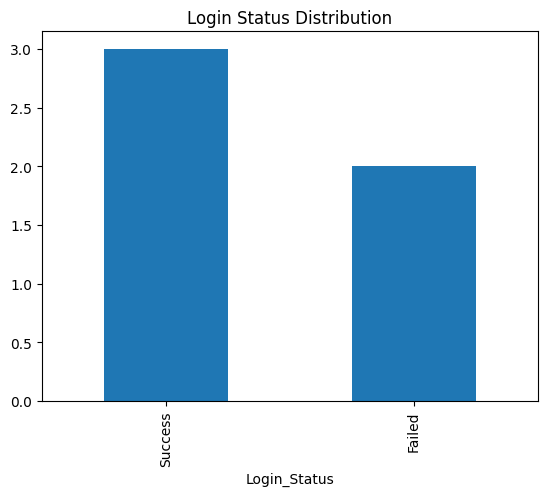

In [5]:
import matplotlib.pyplot as plt

df["Login_Status"].value_counts().plot(kind="bar")
plt.title("Login Status Distribution")
plt.show()


Findings

Admin account attempted login from unknown location

Failed logins detected during non-business hours

Analysts and interns have limited access compared to admin


Recommendations
Enable MFA for Admin users

Restrict login by geo-location

Monitor failed login attempts using SIEM